# A simple neural network implemented by using only numpy
<img src='images/neural-network.png'>

### Create dummy data

In [36]:
from sklearn.datasets import make_regression

n_samples = 100

data = make_regression(n_samples=n_samples, n_features=2)
x = data[0]
y = np.expand_dims(data[1], axis=1)

print('x', x.shape)
print('y', y.shape)

x (100, 2)
y (100, 1)


### Plot the generated data

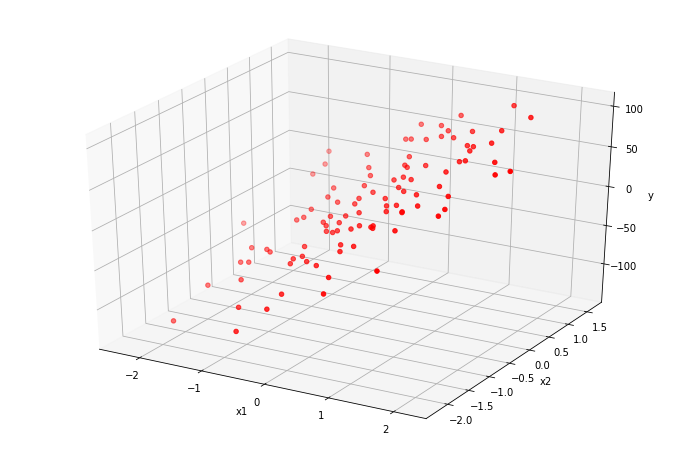

In [75]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot(x, y, c='r'):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x[:,0], x[:,1], y[:,0], c=c)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

    plt.show()

plot(x, y)

### Split data in three data sets: training, validation and test

In [37]:
train_index = int(n_samples * 0.7)
validation_index = int(n_samples * 0.8)

x_train, y_train = x[:train_index], y[:train_index]
x_valid, y_valid = x[train_index:validation_index], y[train_index:validation_index]
x_test, y_test = x[validation_index:], y[validation_index:]

In [38]:
print('x_train, y_train', x_train.shape, y_train.shape)
print('x_valid', 'y_valid', x_valid.shape, y_valid.shape)
print('x_test', 'y_test', x_test.shape, y_test.shape)

x_train, y_train (70, 2) (70, 1)
x_valid y_valid (10, 2) (10, 1)
x_test y_test (20, 2) (20, 1)


### Create the network

In [76]:
import numpy as np

class NeuralNetwork(epochs=100, learning_rate=0.01):
    
    def __init__(self):
        # set random seed
        np.random.seed(42)
        
        # initialize weights matrix W1 (from input layer to hidden layer)
        self.W1 = 2 * np.random.random((2, 3)) - 1
        
        # initialize weights matrix W2 (from hidden layer to output layer)
        self.W2 = 2 * np.random.random((3, 1)) - 1
        
    # sigmoid activation function for the hidden layer
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
        
    # derivative of the sigmoid function
    def __sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def mean_square(target, output):
        return (target - output)**2

    # feed forward
    def feed_forward(self, x):
        # from input to hidden layer
        hidden_input = np.dot(x_train, self.W1)
        # hidden layer uses the sigmoid as an activation function
        hidden_output = self.__sigmoid(hidden_input)
        
        # save the hidden state for the backpropagation step
        self.h = hidden_output
        
        # from hidden layer to output
        output = np.dot(hidden_output, self.W2)
        
        return output
    
    # train
    def train(self, x_train, y_train, x_valid, y_valid):
        for _ in range(epochs):
            # feed forward
            output = self.feed_forward(x_train)
            
            # error
            error = y_train - output
            
            # graditent for W2
            W2_gradient = self.h
            
            # W2_delta
            W2_delta = learning_rate * error * W2_gradient
            
            # Adjust W2 if necessary
            W2 = W2 + W2_delta
            

### Train the network

In [49]:
epochs = 1000
learning_rate = 0.001

# initialize the network
nn = NeuralNetwork()

output = nn.feed_forward(x_train)
output.shape

(70, 1)